In [13]:
# warning 제거 
import warnings 
warnings.filterwarnings(action='ignore')

import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import platform

def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [14]:
final = pd.read_csv("datas/final_movie_dataset.csv")
need = pd.read_csv("datas/origin_eda_to_dataset.csv")

In [15]:
final = final.rename(columns={'actor_power in oscar' : 'actor_power_in_oscar',
             'writer_power in oscar' : 'writer_power_in_oscar',
             'director_power in oscar' : 'director_power_in_oscar'})

In [16]:
final = final.drop( ['worldwide_gross_income.1' , 'budget.1'],1    )

## Case1 : 전체 피쳐를 사용한 regression

In [17]:
final.columns

Index(['duration', 'avg_vote', 'budget', 'worldwide_gross_income', 'metascore',
       'director_power', 'book_label', 'production_power', 'ROI',
       'actor_power_in_oscar', 'writer_power_in_oscar',
       'director_power_in_oscar', 'G', 'NC17', 'PG', 'PG-13', 'R', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [18]:
# 데이터 분리
X = final.drop(['ROI','worldwide_gross_income'],1)
y = final['worldwide_gross_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

#### 1-1 ols

In [19]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     worldwide_gross_income   R-squared:                       0.755
Model:                                OLS   Adj. R-squared:                  0.749
Method:                     Least Squares   F-statistic:                     122.7
Date:                    Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                            16:56:59   Log-Likelihood:                -24583.
No. Observations:                    1227   AIC:                         4.923e+04
Df Residuals:                        1196   BIC:                         4.939e+04
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
duration                -1.522e+05   2.87e+05     -0.530      0.596   -7.16e+05    4.11e+05
avg_vote                 1.947e+07   6.17e+06      3.155      0.002    7.36e+06    3.16e+07
budget                      2.4815      0.119     20.821      0.000       2.248       2.715
metascore                6.715e+05   3.07e+05      2.189      0.029    6.97e+04    1.27e+06
director_power              0.1348      0.008     17.852      0.000       0.120       0.150
book_label               1.229e+05   1.23e+07      0.010      0.992    -2.4e+07    2.43e+07
production_power            0.0002      0.001      0.372      0.710      -0.001       0.001
actor_power_in_oscar    -1.059e+07   8.89e+06     -1.190      0.234    -2.8e+07    6.86e+06
writer_power_in_oscar    -4.35e+06   1.81e+07     -0.240      0.810   -3.99e+07    3.12e+07
director_power_in_oscar -6.779e+07   1.41e+07     -4.802      0.000   -9.55e+07   -4.01e+07
G                       -2.159e+07   3.94e+07     -0.547      0.584    -9.9e+07    5.58e+07
NC17                     -1.72e+07   1.09e+08     -0.157      0.875   -2.32e+08    1.98e+08
PG                      -4.327e+07   2.42e+07     -1.786      0.074   -9.08e+07    4.26e+06
PG-13                   -4.361e+07   2.33e+07     -1.868      0.062   -8.94e+07    2.19e+06
R                       -5.071e+07   2.32e+07     -2.187      0.029   -9.62e+07   -5.21e+06
Action                  -8.016e+07   1.81e+07     -4.435      0.000   -1.16e+08   -4.47e+07
Adventure               -9.807e+07   2.28e+07     -4.310      0.000   -1.43e+08   -5.34e+07
Animation                1.756e+06   2.45e+07      0.072      0.943   -4.64e+07    4.99e+07
Biography               -9.135e+07   2.12e+07     -4.314      0.000   -1.33e+08   -4.98e+07
Comedy                  -6.411e+07   1.81e+07     -3.536      0.000   -9.97e+07   -2.85e+07
Crime                   -7.194e+07   2.28e+07     -3.161      0.002   -1.17e+08   -2.73e+07
Drama                   -6.142e+07   1.85e+07     -3.328      0.001   -9.76e+07   -2.52e+07
Family                   6.196e+08   1.18e+08      5.247      0.000    3.88e+08    8.51e+08
Fantasy                 -6.245e+07   6.02e+07     -1.038      0.300   -1.81e+08    5.56e+07
Horror                  -1.531e+07   2.16e+07     -0.710      0.478   -5.76e+07     2.7e+07
Music                      -0.0042      0.001     -4.339      0.000      -0.006      -0.002
Mystery                 -4.322e+07   1.19e+08     -0.365      0.715   -2.76e+08    1.89e+08
Romance                 -9.734e+07   6.89e+07     -1.412      0.158   -2.33e+08    3.79e+07
Sci-Fi                  -5.973e+07   1.17e+08     -0.510      0.610   -2.89e+08     1.7e+08
Thriller                -5.262e+07   8.36e+07     -0.629      0.529   -2.17e+08    1.11e+08
Fal

In [20]:
pd.options.display.float_format = '{:,.5}'.format

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor                 features
0       1.8339                 duration
1       2.6744                 avg_vote
2       3.1903                   budget
3       2.4059                metascore
4       1.9143           director_power
5       1.0552               book_label
6       1.5088         production_power
7       1.0343     actor_power_in_oscar
8       1.0684    writer_power_in_oscar
9       1.1435  director_power_in_oscar
10  2.5444e+13                        G
11   2.626e+13                     NC17
12   2.502e+14                       PG
13  3.3862e+13                    PG-13
14  8.9919e+11                        R
15  2.1969e+14                   Action
16  4.9764e+13                Adventure
17  1.9185e+12                Animation
18  1.1154e+12                Biography
19  1.3035e+13                   Comedy
20  3.6029e+14                    Crime
21  3.8085e+12                    Drama
22  3.0024e+15                   Family
23  1.5012e+15                  Fantasy
24  2.7049e+13                   Horror
25   1.112e+14                    Music
26  1.4766e+14                  Mystery
27  1.1259e+15                  Romance
28   7.506e+14                   Sci-Fi
29    4.17e+13                 Thriller
30  1.8765e+13                     Fall
31  1.0008e+15                   Spring
32  3.4643e+14                   Summer
33  4.5036e+15                   Winter

#### 1-2 model - LinearRegressor, Ridge, Lasso, RandomForestRegressor, DecisionTreeRegressor & cross validation

In [82]:
def get_model(model):
    
    regressor = model()
    regressor.fit(X_train, y_train)

    # 모델예측
    pred_tr = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)
    rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
    rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))
    
    print(f"{model}")
    print('RMSE of Train Data : ', round(rmse_tr, 3))
    print('Train r2_score: {:.3f}'.format(round(r2_score(y_train, pred_tr),6)))
    print('RMSE of Test Data : ', round(rmse_test,3))
    print('Test r2_score: {:.3f}'.format(round(r2_score(y_test, pred_test),6)))
    print("\n")

In [83]:
for model in [LinearRegression, Ridge, Lasso, RandomForestRegressor]:
    models = get_model(model)

<class 'sklearn.linear_model._base.LinearRegression'>
RMSE of Train Data :  126750208.374
Train r2_score: 0.729
RMSE of Test Data :  115058350.901
Test r2_score: 0.715


<class 'sklearn.linear_model._ridge.Ridge'>
RMSE of Train Data :  126750377.817
Train r2_score: 0.729
RMSE of Test Data :  115064772.38
Test r2_score: 0.715


<class 'sklearn.linear_model._coordinate_descent.Lasso'>
RMSE of Train Data :  126750208.374
Train r2_score: 0.729
RMSE of Test Data :  115058351.216
Test r2_score: 0.715


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RMSE of Train Data :  48248300.18
Train r2_score: 0.961
RMSE of Test Data :  102949114.738
Test r2_score: 0.772




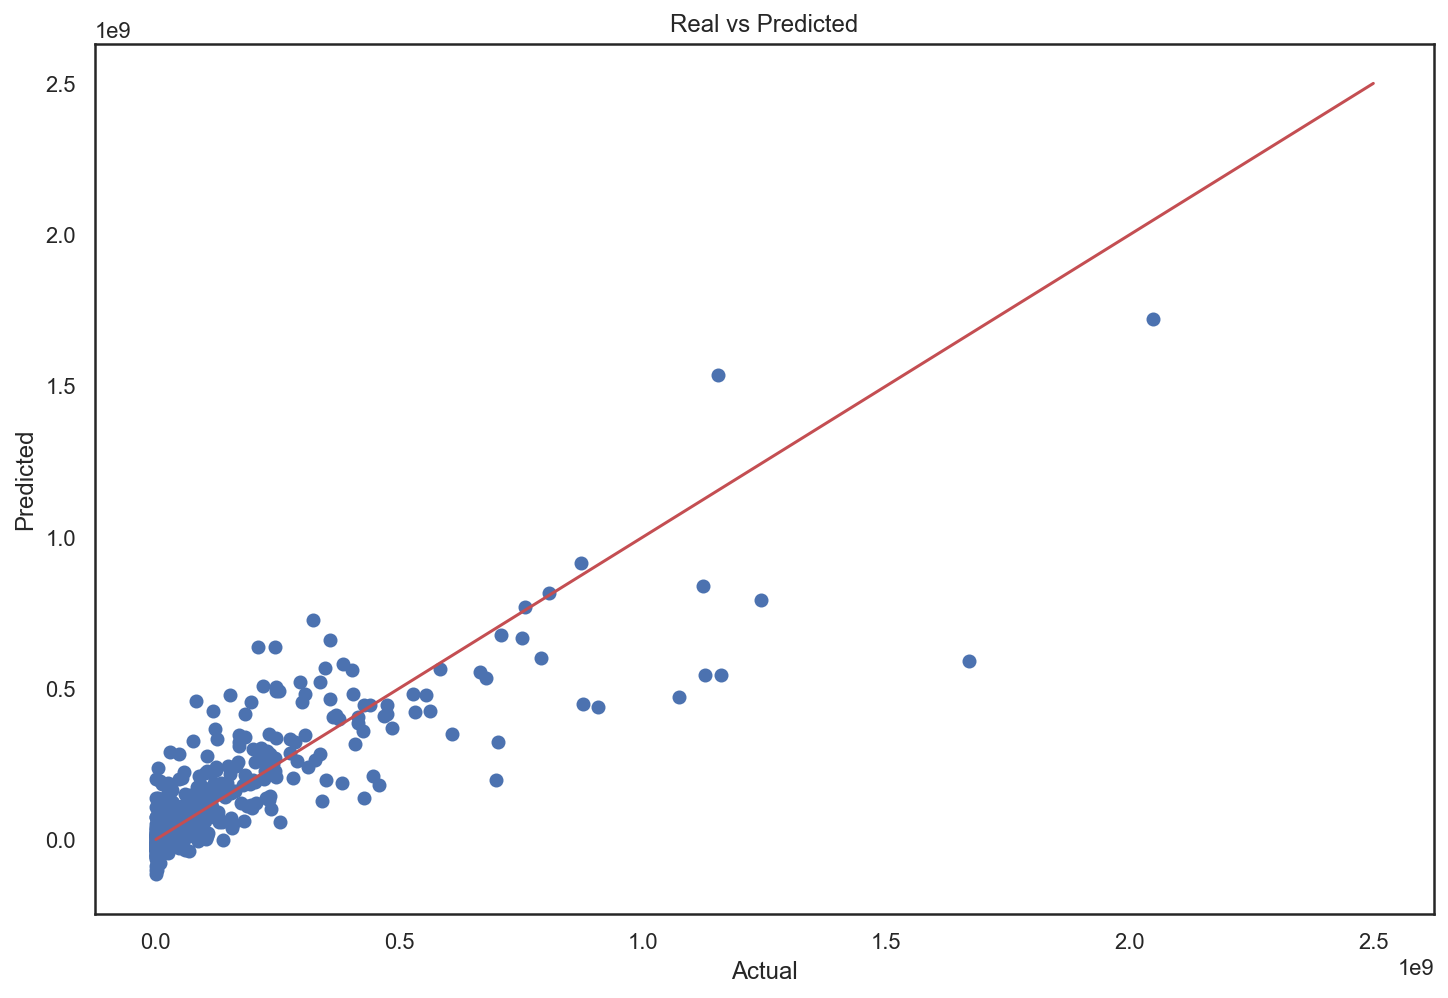

In [24]:
### 그림을 그리기 위해 가져온 모델
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_tr = regressor.predict(X_train)
pred_test = regressor.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

plt.figure(figsize=(12,8))
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Real vs Predicted")
plt.plot([0,2.5e9], [0,2.5e9], 'r')
plt.show()

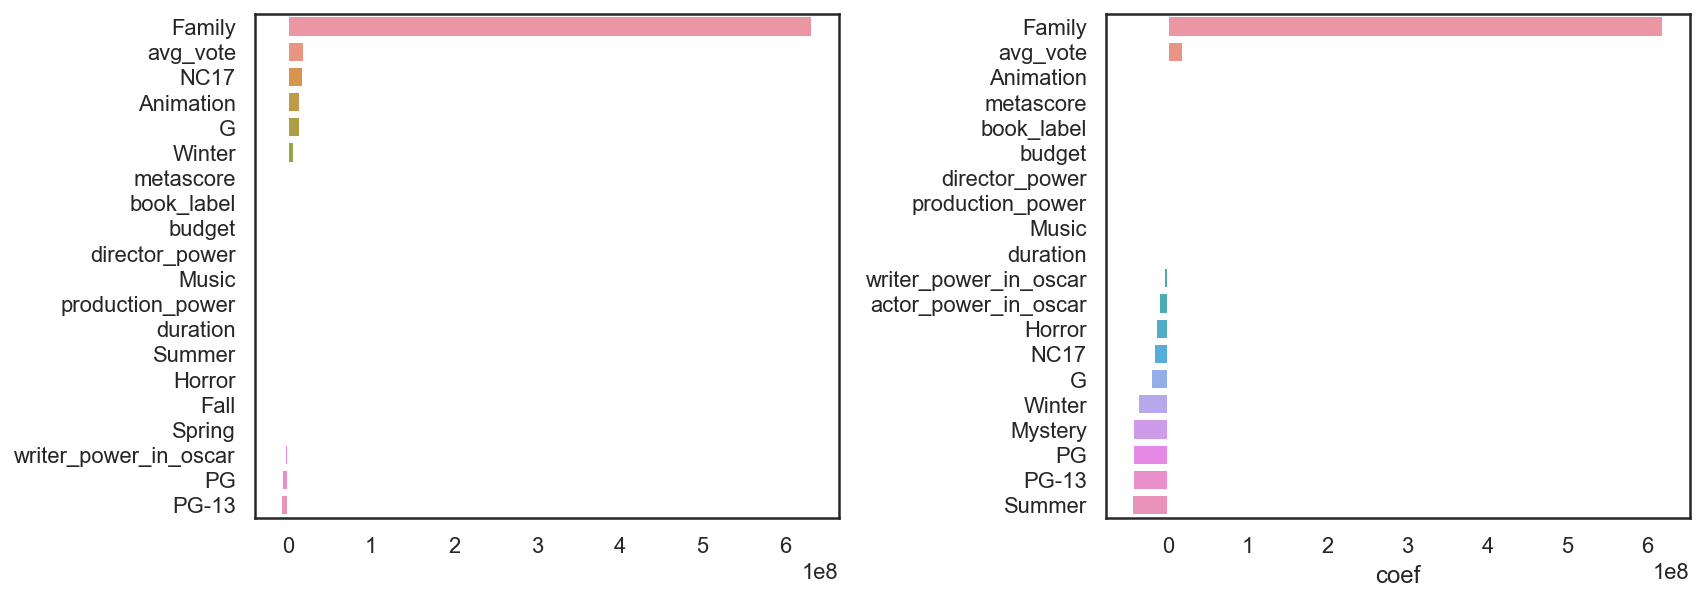

In [25]:
# 선형회귀계수와 ols 계수 확인.
lin_coef = pd.Series(regressor.coef_, index=X.columns)
lin_coef_sort = lin_coef.sort_values(ascending=False)[:20]
ols_coef = pd.DataFrame(lm.params, columns=['coef'])
ols_coef_sort = ols_coef.sort_values(by='coef', ascending=False)[:20]

plt.figure(figsize=(12,8))

plt.subplot(221)
sns.barplot(x=lin_coef_sort.values, y=lin_coef_sort.index);
# sns.regplot(x=X['Family Fantasy'], y=y_log, data = final);

plt.subplot(222)
sns.barplot(x=ols_coef_sort['coef'], y=ols_coef_sort.index)

plt.tight_layout()
plt.show()

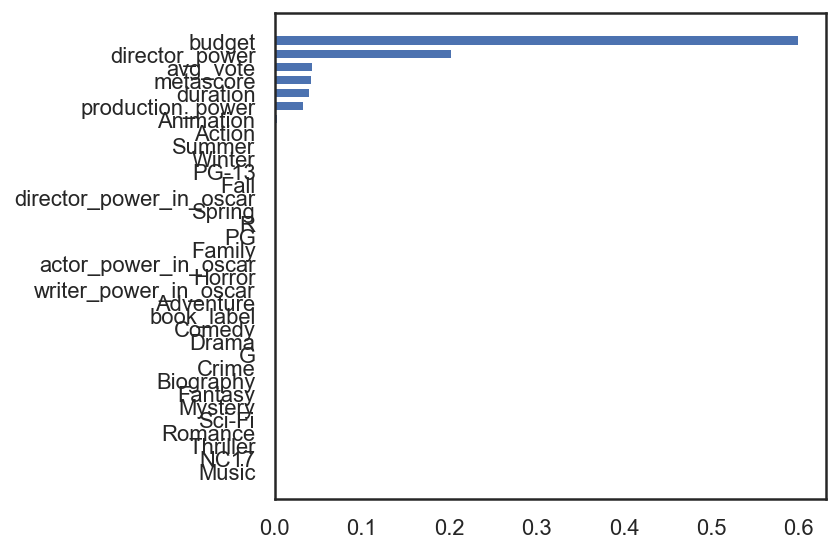

In [26]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

featureImportance = model.feature_importances_
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
colnames = X.columns

plt.barh(barPos, featureImportance[sorted_idx], align='center') # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(barPos, colnames[sorted_idx])
plt.tight_layout()
plt.show()

## 과적합 문제 발생
random_state 값을 올릴수록 train 값과 test 값의 r2 score 차이가 커짐\
또는 스케일러를 썼을때 train은 학습이 잘 되지만 test 값에서 r2 score 값이 음수가 나오는 등의 과적합 문제가 발생하여\
과적합을 줄이는 것에 힘쓰기로 함.

## Case2 : 피쳐 스케일링 후 10개의 연속성이 있는 피쳐들만 사용 

In [27]:
# feature scaling

In [28]:
data1 = final.copy()

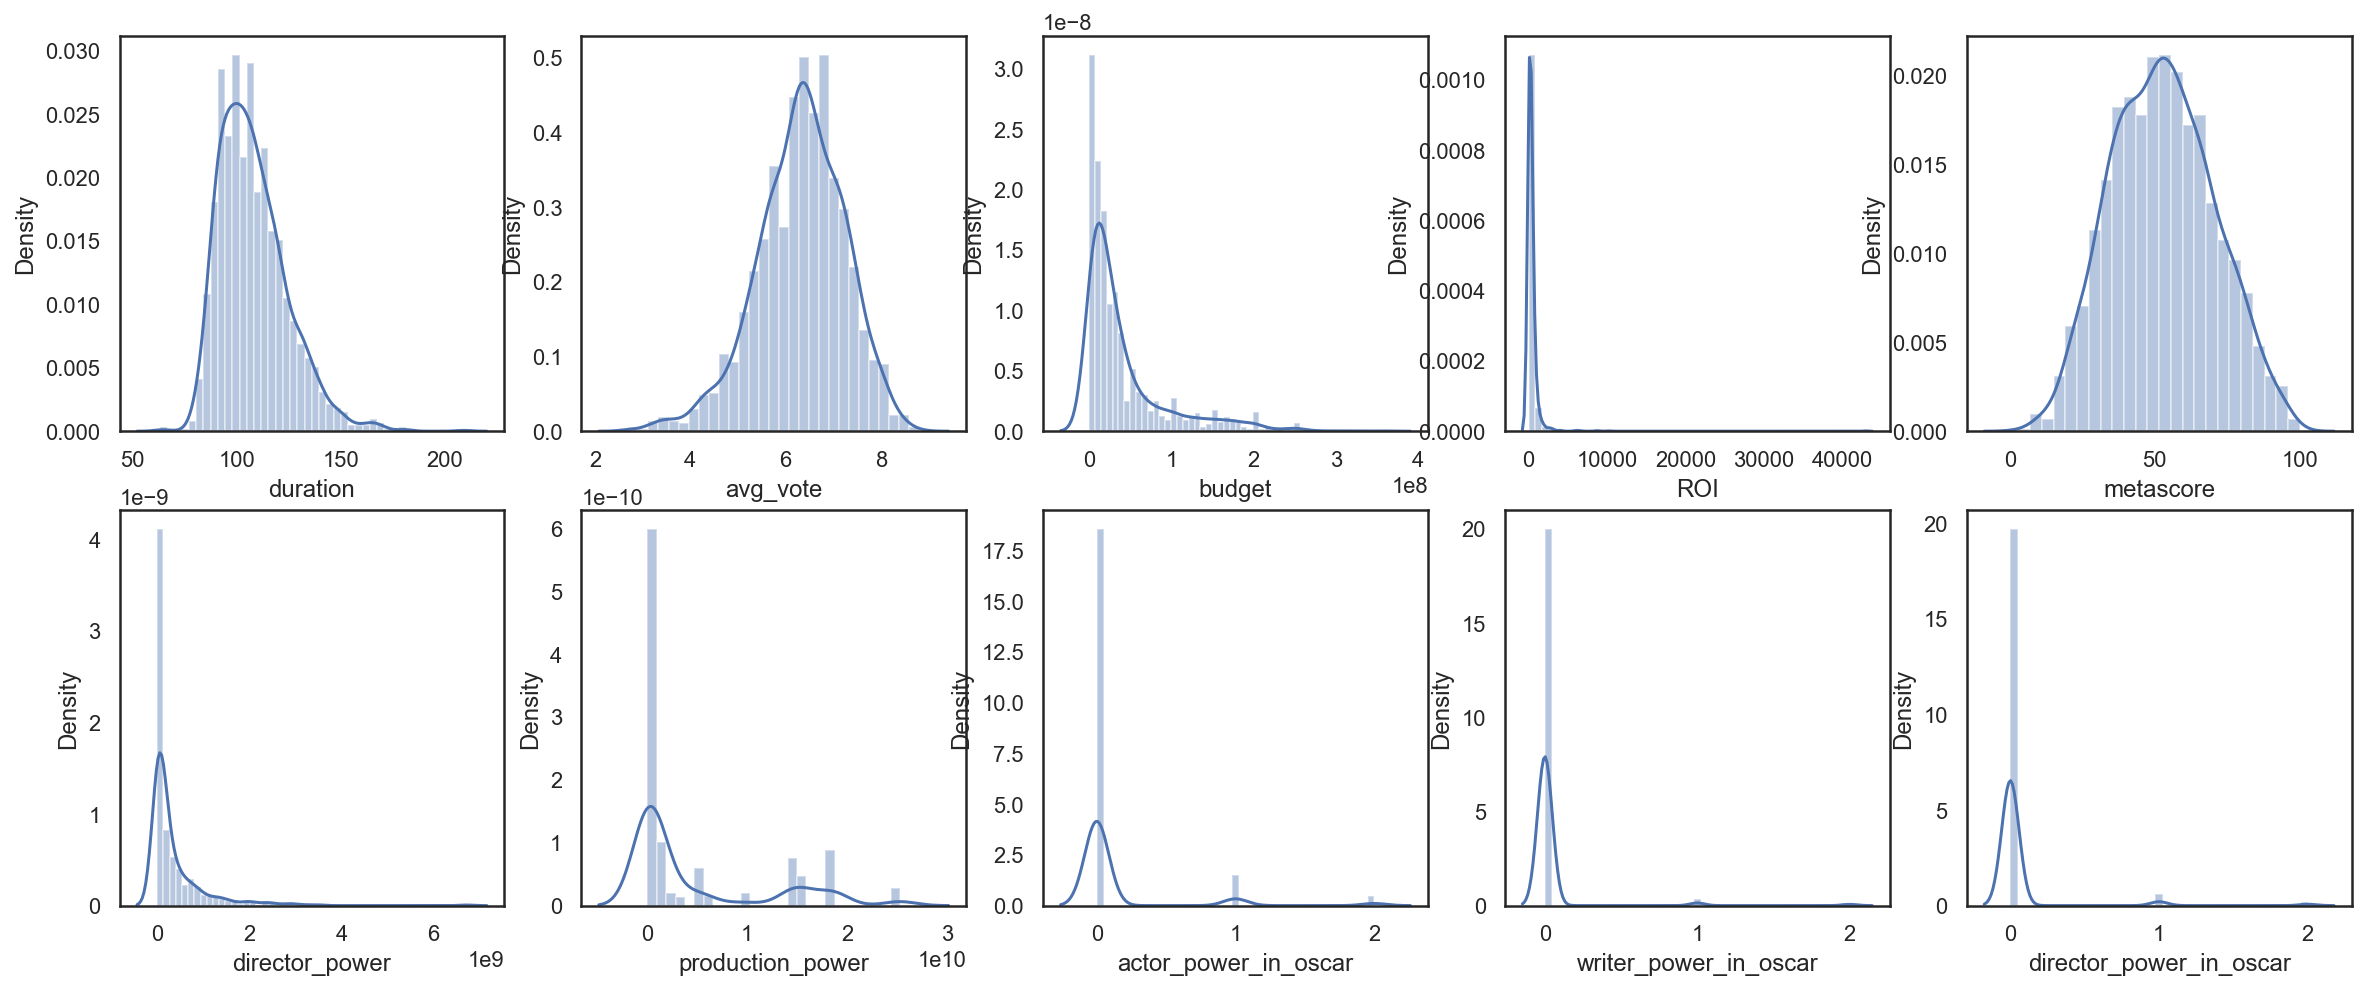

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
sns.distplot(data1['duration'], ax=axes[0, 0], label="duration")
sns.distplot(data1["avg_vote"], ax=axes[0, 1], label="avg_vote")
sns.distplot(data1["budget"], ax=axes[0, 2], label="budget")
sns.distplot(data1["ROI"], ax=axes[0, 3], label="ROI")
sns.distplot(data1["metascore"], ax=axes[0, 4], label="metascore")
sns.distplot(data1["director_power"], ax=axes[1, 0], label="director_power")
sns.distplot(data1["production_power"], ax=axes[1, 1], label="production_power")
sns.distplot(data1["actor_power_in_oscar"], ax=axes[1, 2], label="actor_power_in_oscar")
sns.distplot(data1["writer_power_in_oscar"], ax=axes[1, 3], label="writer_power_in_oscar")
sns.distplot(data1['director_power_in_oscar'], ax=axes[1, 4], label="director_power_in_oscar")
plt.show()

In [31]:
RS = RobustScaler()
RS.fit(data1)

movie_rs = RS.transform(data1)
movie_rs_features = pd.DataFrame(movie_rs, columns=data1.columns)

In [32]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=movie_rs_features['budget'], name='budget'))
fig.add_trace(go.Box(y=movie_rs_features['director_power'], name='director_power'))
fig.add_trace(go.Box(y=movie_rs_features['production_power'], name='production_power'))
fig.add_trace(go.Box(y=movie_rs_features['actor_power_in_oscar'], name='actor_power_in_oscar'))
fig.add_trace(go.Box(y=movie_rs_features['worldwide_gross_income'], name='worldwide_gross_income'))


fig.show()

In [33]:
data1.columns

Index(['duration', 'avg_vote', 'budget', 'worldwide_gross_income', 'metascore',
       'director_power', 'book_label', 'production_power', 'ROI',
       'actor_power_in_oscar', 'writer_power_in_oscar',
       'director_power_in_oscar', 'G', 'NC17', 'PG', 'PG-13', 'R', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [34]:
nonscaling = data1[['actor_power_in_oscar',
       'director_power_in_oscar','book_label']]
scaling = movie_rs_features[['duration', 'avg_vote', 'budget', 'metascore',
       'director_power']]
features = pd.concat([scaling, nonscaling],1)

In [55]:
# 데이터 분리
X_feature = features
y = final['worldwide_gross_income']
X_feature1 = sm.add_constant(X_feature, has_constant = "add") # 상수항

X_train, X_test, y_train, y_test = train_test_split(X_feature1, y, test_size=0.3, random_state=13)

In [56]:
lm2 = sm.OLS(y_train, X_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     worldwide_gross_income   R-squared:                       0.739
Model:                                OLS   Adj. R-squared:                  0.737
Method:                     Least Squares   F-statistic:                     431.4
Date:                    Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                            16:57:47   Log-Likelihood:                -24621.
No. Observations:                    1227   AIC:                         4.926e+04
Df Residuals:                        1218   BIC:                         4.931e+04
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.916e+07   4.49e+06     10.959      0.000    4.04e+07     5.8e+07
duration                -1.654e+07   5.49e+06     -3.014      0.003   -2.73e+07   -5.78e+06
avg_vote                 2.379e+07   8.01e+06      2.970      0.003    8.07e+06    3.95e+07
budget                   1.092e+08   3.91e+06     27.955      0.000    1.02e+08    1.17e+08
metascore                2.134e+07   7.57e+06      2.819      0.005    6.49e+06    3.62e+07
director_power           5.834e+07   3.29e+06     17.737      0.000    5.19e+07    6.48e+07
actor_power_in_oscar    -1.303e+07   8.98e+06     -1.451      0.147   -3.07e+07    4.59e+06
director_power_in_oscar -6.828e+07   1.39e+07     -4.904      0.000   -9.56e+07    -4.1e+07
book_label               9.358e+06   1.23e+07      0.762      0.446   -1.47e+07    3.35e+07
==============================================================================
Omnibus:                      485.559   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9543.850
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                      16.401   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2-2 LinearRegression, Ridge, Lasso, RandomForestRegressor, DecisionTreeRegressor 후 모델별 cross validation

In [57]:
for model in [LinearRegression, Ridge, Lasso, RandomForestRegressor]:
    models = get_model(model)

<class 'sklearn.linear_model._base.LinearRegression'>
RMSE of Train Data :  125396337.763
Train r2_score: 0.739
RMSE of Test Data :  120417773.405
Test r2_score: 0.698


<class 'sklearn.linear_model._ridge.Ridge'>
RMSE of Train Data :  125396556.842
Train r2_score: 0.739
RMSE of Test Data :  120412755.082
Test r2_score: 0.698


<class 'sklearn.linear_model._coordinate_descent.Lasso'>
RMSE of Train Data :  125396337.763
Train r2_score: 0.739
RMSE of Test Data :  120417773.278
Test r2_score: 0.698


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RMSE of Train Data :  49411170.485
Train r2_score: 0.959
RMSE of Test Data :  114814758.416
Test r2_score: 0.725




In [37]:
## feature importances

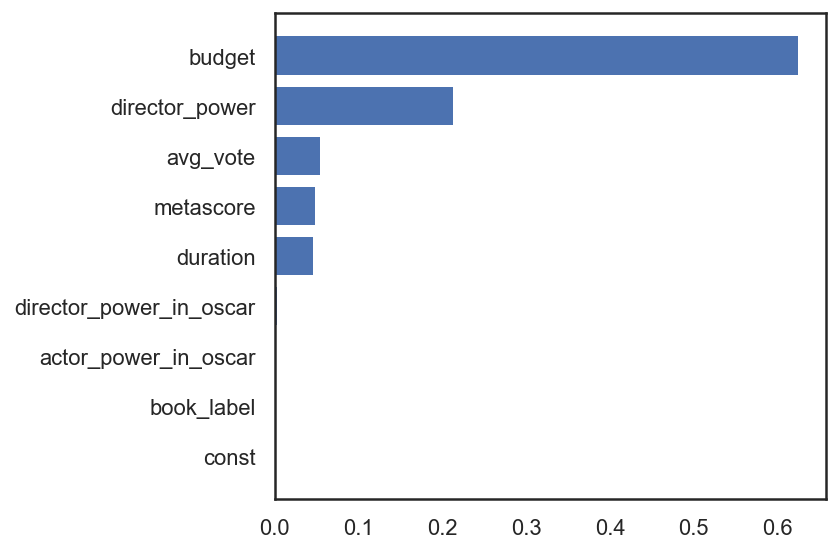

In [58]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

featureImportance = model.feature_importances_
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
colnames = X_feature1.columns

plt.barh(barPos, featureImportance[sorted_idx], align='center') # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(barPos, colnames[sorted_idx])

plt.tight_layout()
plt.show()

In [59]:
data3 = final.copy()

In [60]:
X = data3[['duration', 'avg_vote', 'budget', 'metascore', 'director_power','actor_power_in_oscar', 'director_power_in_oscar', 'book_label']]

In [61]:
feature_names = ['duration', 'avg_vote', 'budget', 'metascore', 'director_power','actor_power_in_oscar', 'director_power_in_oscar', 'book_label']
feature_names = ["scale({})".format(name) for name in feature_names]
model3 = sm.OLS.from_formula(
    "worldwide_gross_income ~" + "+".join(feature_names), data=data3)
result3 = model3.fit()
print(result3.summary())

                              OLS Regression Results                              
Dep. Variable:     worldwide_gross_income   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.728
Method:                     Least Squares   F-statistic:                     587.3
Date:                    Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                            16:57:55   Log-Likelihood:                -35174.
No. Observations:                    1754   AIC:                         7.037e+04
Df Residuals:                        1745   BIC:                         7.041e+04
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [62]:
pred = result3.predict(X)

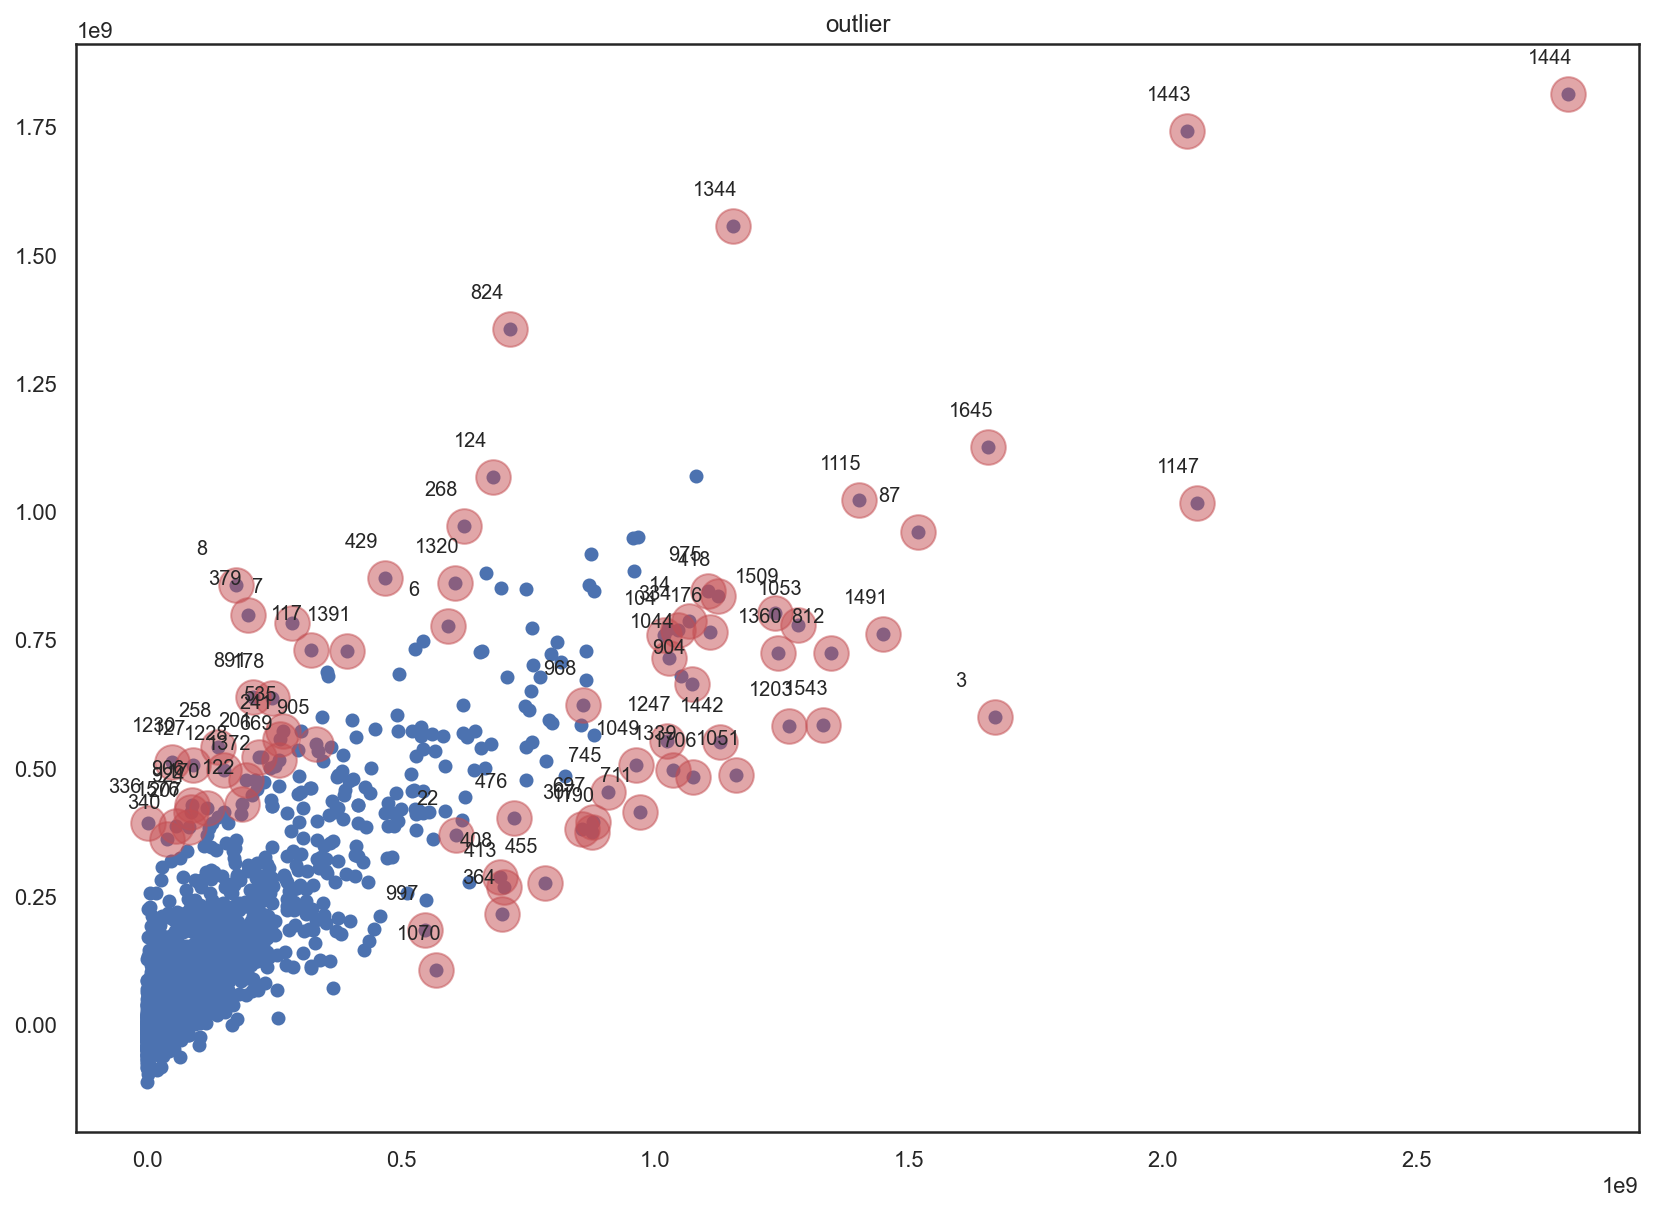

In [63]:
from statsmodels.graphics import utils

plt.figure(figsize=(14, 10))

influence = result3.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (740 - 36 - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(y, pred)
plt.scatter(y[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(y[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("outlier")
plt.show()

In [64]:
print(idx)

[   3    6    7    8   14   22   87  104  117  122  124  127  170  176
  178  201  207  241  258  268  307  334  336  340  364  379  408  413
  418  429  455  476  535  669  697  711  745  812  824  891  904  905
  906  924  968  975  997 1044 1049 1051 1053 1070 1115 1147 1190 1203
 1228 1230 1247 1320 1339 1344 1360 1372 1391 1442 1443 1444 1491 1509
 1543 1576 1645 1706]


In [65]:
cooks_dict = {}
for index in idx:
    cooks_dict[str(index)] = cooks_d2[index]
cooks_dict = sorted(cooks_dict.items(), key=(lambda x : x[1]), reverse=True)
cooks_arr = cooks_dict[:20]
cooks_arr

[('1444', 0.4581985857332714),
 ('824', 0.2498069218670451),
 ('1147', 0.09651877773227976),
 ('1344', 0.08391792971786821),
 ('8', 0.056445280733275836),
 ('336', 0.04945412274836416),
 ('1230', 0.04579050991410121),
 ('1706', 0.045113669547888605),
 ('1443', 0.04382815230873987),
 ('1491', 0.03501177712464212),
 ('1645', 0.03438348263699765),
 ('997', 0.033604426972204116),
 ('904', 0.03212930794305626),
 ('3', 0.03135989784686889),
 ('1203', 0.030548383319579053),
 ('1051', 0.02840552784793826),
 ('812', 0.02589618664004361),
 ('87', 0.025509226364490104),
 ('1372', 0.02514111767590338),
 ('1070', 0.024101464950304897)]

In [66]:
outlier_index = []
for value in cooks_arr:
    print(value[0], need.iloc[int(value[0])]['title'])
    outlier_index.append(int(value[0]))

1444 Avengers: Endgame
824 Captain America: The Winter Soldier
1147 Star Wars - Il risveglio della Forza
1344 Captain America: Civil War
8 Cowboys & Aliens
336 The Irishman
1230 Chef - La ricetta perfetta
1706 Joker
1443 Avengers: Infinity War
1491 Frozen II - Il segreto di Arendelle
1645 Il Re Leone
997 American Sniper
904 Toy Story 4
3 Jurassic World
1203 La bella e la bestia
1051 Minions
812 Black Panther
87 The Avengers
1372 Il GGG - Il grande gigante gentile
1070 Cinquanta sfumature di grigio


In [67]:
data4= data3.copy()
data4 = data3.drop(index-outlier_index)
len(data4)

1734

In [68]:
data5 = data4.copy()

------------------

In [85]:
data5.columns

Index(['duration', 'avg_vote', 'budget', 'worldwide_gross_income', 'metascore',
       'director_power', 'book_label', 'production_power', 'ROI',
       'actor_power_in_oscar', 'writer_power_in_oscar',
       'director_power_in_oscar', 'G', 'NC17', 'PG', 'PG-13', 'R', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [86]:
X_features = data5[['duration', 'avg_vote', 'budget', 'metascore',
       'director_power', 'book_label', 'actor_power_in_oscar', 'director_power_in_oscar']]
y_target = data5['worldwide_gross_income']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=13)

In [87]:
feature_names = ['duration', 'avg_vote', 'budget', 'metascore', 'director_power','actor_power_in_oscar', 'director_power_in_oscar', 'book_label']
feature_names = ["scale({})".format(name) for name in feature_names]
model5 = sm.OLS.from_formula(
    "worldwide_gross_income ~" + "+".join(feature_names), data=data5)
result5 = model5.fit()
print(result5.summary())

                              OLS Regression Results                              
Dep. Variable:     worldwide_gross_income   R-squared:                       0.727
Model:                                OLS   Adj. R-squared:                  0.726
Method:                     Least Squares   F-statistic:                     573.6
Date:                    Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                            17:10:32   Log-Likelihood:                -34773.
No. Observations:                    1734   AIC:                         6.956e+04
Df Residuals:                        1725   BIC:                         6.961e+04
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, random_state=13)

In [89]:
for model in [LinearRegression, Ridge, Lasso, RandomForestRegressor]:
    models = get_model(model)

<class 'sklearn.linear_model._base.LinearRegression'>
RMSE of Train Data :  126750208.374
Train r2_score: 0.729
RMSE of Test Data :  115058350.901
Test r2_score: 0.715


<class 'sklearn.linear_model._ridge.Ridge'>
RMSE of Train Data :  126750377.817
Train r2_score: 0.729
RMSE of Test Data :  115064772.38
Test r2_score: 0.715


<class 'sklearn.linear_model._coordinate_descent.Lasso'>
RMSE of Train Data :  126750208.374
Train r2_score: 0.729
RMSE of Test Data :  115058351.216
Test r2_score: 0.715


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RMSE of Train Data :  48196684.784
Train r2_score: 0.961
RMSE of Test Data :  102686483.112
Test r2_score: 0.773




In [100]:
def display_scores(scores):
    print("r2 scores : ",scores)
    print("평균 :", scores.mean())
    print("표준편차:", scores.std())

def get_model(model):
    
    regressor = model()
    regressor.fit(X_train, y_train)

    # 모델예측
    pred_tr = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)
    rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
    rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))
    
    print("[cross_val]")
    full_train_scores = cross_val_score(regressor, X_train, y_train, scoring = "r2", cv=KFold(n_splits=5))
    full_test_scores = cross_val_score(regressor, X_test, y_test, scoring = "r2", cv=KFold(n_splits=5))
    print("  - cv_Train_r2")
    display_scores(full_train_scores)
    print("  - cv_Test_r2")
    display_scores(full_test_scores)
    print('\n')

In [101]:
for model in [LinearRegression, Ridge, Lasso, RandomForestRegressor]:
    models = get_model(model)

[cross_val]
  - cv_Train_r2
r2 scores :  [0.7567072  0.72804934 0.68430979 0.60007443 0.74900519]
평균 : 0.7036291911144632
표준편차: 0.057566356533192156
  - cv_Test_r2
r2 scores :  [0.70378471 0.70771565 0.69562963 0.63924422 0.66249178]
평균 : 0.6817731976721774
표준편차: 0.026570679268133234


[cross_val]
  - cv_Train_r2
r2 scores :  [0.75671158 0.72803302 0.68417148 0.60015201 0.74905957]
평균 : 0.7036255315351222
표준편차: 0.05755577568065125
  - cv_Test_r2
r2 scores :  [0.70346642 0.71136571 0.69603762 0.6391994  0.66257282]
평균 : 0.6825283932013047
표준편차: 0.027306106749711387


[cross_val]
  - cv_Train_r2
r2 scores :  [0.7567072  0.72804934 0.68430979 0.60007443 0.74900519]
평균 : 0.7036291901528575
표준편차: 0.05756635544040182
  - cv_Test_r2
r2 scores :  [0.7037847  0.70771568 0.69562963 0.63924423 0.66249178]
평균 : 0.6817732037868213
표준편차: 0.02657068192221777


[cross_val]
  - cv_Train_r2
r2 scores :  [0.75765527 0.79942026 0.73534214 0.66901317 0.76585367]
평균 : 0.745456901451702
표준편차: 0.0434115773555